In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Partial Derivatives and the Jacobian

The partial derivative of a vector-valued function $ f : \mathbb{R}^n \to \mathbb{R}^m $ with respect to $ x_i \in \mathbb{R} $ (where $ i = 1, \ldots, n $) is given as the vector:

$$
\frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f_1(x_1, \ldots, x_{i-1}, x_i + h, x_{i+1}, \ldots, x_n) - f_1(x)}{h}
$$

$$
\vdots
$$

$$
\frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f_m(x_1, \ldots, x_{i-1}, x_i + h, x_{i+1}, \ldots, x_n) - f_m(x)}{h}
$$

From the definition of the gradient, we know that the gradient of $ f $ with respect to a vector is the row vector of the partial derivatives. Therefore, we can express the gradient of $ f : \mathbb{R}^n \to \mathbb{R}^m $ as:

$$
\frac{df(x)}{dx} = \begin{bmatrix}
\frac{\partial f_1(x)}{\partial x_1} & \cdots & \frac{\partial f_1(x)}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m(x)}{\partial x_1} & \cdots & \frac{\partial f_m(x)}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

## Definition  (Jacobian)

The collection of all first-order partial derivatives of a vector-valued function $ f : \mathbb{R}^n \to \mathbb{R}^m $ is called the Jacobian. The Jacobian $ J $ is an $ m \times n $ matrix, defined as:

$$
J = \nabla_x f = \begin{bmatrix}
\frac{\partial f_1(x)}{\partial x_1} & \cdots & \frac{\partial f_1(x)}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m(x)}{\partial x_1} & \cdots & \frac{\partial f_m(x)}{\partial x_n}
\end{bmatrix}
$$

As a special case, for a function $ P f : \mathbb{R}^n \to \mathbb{R}^1 $ (e.g., $ f(x) = \sum_{i=1}^n x_i $), the Jacobian is a row vector (matrix of dimension $ 1 \times n $).

## Remark

In this context, we use the numerator layout of the derivative, i.e., the derivative $ \frac{df}{dx} $ of $ f \in \mathbb{R}^m $ with respect to $ x \in \mathbb{R}^n $ is an $ m \times n $ matrix, where the elements of $ f $ define the rows and the elements of $ x $ define the columns of the corresponding Jacobian.

# Determinant of the Jacobian and Area Scaling
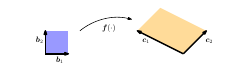

Fig.5 illustrates that the determinant of the Jacobian of $ f $ can be used to compute the magnifier between the blue and orange areas. There exists also a denominator layout, which is the transpose of the numerator layout. In this book, we will use the numerator layout.

We will see how the Jacobian is used in the change-of-variable method for probability distributions in Section 6.7. The amount of scaling due to the transformation of a variable is provided by the determinant. 

In Section 4.1, we saw that the determinant can be used to compute the area of a parallelogram. If we are given two vectors 

$$
b_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad b_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

as the sides of the unit square (blue; see Figure 5.5), the area of this square is 

$$
\text{det} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = 1.
$$

If we take a parallelogram with the sides 

$$
c_1 = \begin{bmatrix} -2 \\ 1 \end{bmatrix}, \quad c_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$ 

(orange in Figure 5.5), its area is given as the absolute value of the determinant:

$$
\text{det} \begin{bmatrix} -2 & 1 \\ 1 & 1 \end{bmatrix} = |-3| = 3,
$$ 

i.e., the area of this is exactly three times the area of the unit square. We can find this scaling factor by finding a mapping that transforms the unit square into the other square. 

In linear algebra terms, we effectively perform a variable transformation from $ (b_1, b_2) $ to $ (c_1, c_2) $. In our case, the mapping is linear, and the absolute value of the determinant of this mapping gives us exactly the scaling factor we are looking for. 

## Approach 1

To get started with the linear algebra approach, we identify both $ \{b_1, b_2\} $ and $ \{c_1, c_2\} $ as bases of $ \mathbb{R}^2 $. What we effectively perform is a change of basis from $ (b_1, b_2) $ to $ (c_1, c_2) $, and we are looking for the transformation matrix that implements the basis change. 

Using results from Section 2.7.2, we identify the desired basis change matrix as 

$$
J = \begin{bmatrix} -2 & 1 \\ 1 & 1 \end{bmatrix},
$$ 

such that $ J b_1 = c_1 $ and $ J b_2 = c_2 $. The absolute value of the determinant of $ J $ gives us the scaling factor.

In [1]:
def compute_determinant(matrix):
    """Compute the determinant of a 2x2 matrix."""
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def main():
    # Define the unit square vectors
    b1 = [[1, 0], [0, 1]]  # Matrix for unit square

    # Define the parallelogram vectors
    c1 = [[-2, 1], [1, 1]]  # Matrix for parallelogram

    # Compute the determinant for the unit square
    unit_square_det = compute_determinant(b1)
    print(f"Area of the unit square: {unit_square_det}")  # Should be 1

    # Compute the determinant for the parallelogram
    parallelogram_det = compute_determinant(c1)
    print(f"Area of the parallelogram: {abs(parallelogram_det)}")  # Should be 3

if __name__ == "__main__":
    main()

Area of the unit square: 1
Area of the parallelogram: 3


In [2]:
def compute_determinant(matrix):
    """Compute the determinant of an n x n matrix using recursion."""
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    determinant = 0
    for c in range(len(matrix)):
        # Create a submatrix by excluding the first row and current column
        submatrix = [row[:c] + row[c + 1:] for row in matrix[1:]]
        determinant += ((-1) ** c) * matrix[0][c] * compute_determinant(submatrix)
    return determinant

def compute_jacobian(func, variables):
    """Compute the Jacobian matrix of a function."""
    n = len(variables)
    jacobian = [[0] * n for _ in range(n)]
    
    h = 1e-5  # Small value for numerical differentiation
    
    for i in range(n):
        for j in range(n):
            # Create a perturbed variable vector
            x_plus_h = variables[:]
            x_plus_h[j] += h
            
            # Numerical partial derivative
            f_plus_h = func(*x_plus_h)
            f_original = func(*variables)
            jacobian[i][j] = (f_plus_h[i] - f_original[i]) / h
    
    return jacobian

def example_function(x, y):
    """Example function for testing: f(x, y) = [x^2 + y^2, x * y]"""
    return [x**2 + y**2, x * y]

def main():
    # Define the variables
    variables = [1.0, 2.0]  # Example values for x and y
    
    # Compute the Jacobian
    jacobian = compute_jacobian(example_function, variables)
    print("Jacobian Matrix:")
    for row in jacobian:
        print(row)
    
    # Compute the determinant of the Jacobian
    jacobian_det = compute_determinant(jacobian)
    print(f"Determinant of the Jacobian: {jacobian_det}")

if __name__ == "__main__":
    main()

Jacobian Matrix:
[2.00001000001393, 4.000010000027032]
[2.0000000000131024, 1.0000000000065512]
Determinant of the Jacobian: -6.000010000079442


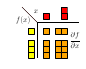

# Jacobian and Scaling Factors

The determinant of $ J $, which yields the scaling factor we are looking for, is given as 

$$
| \text{det}(J) | = 3,
$$ 

i.e., the area of the square spanned by $ (c_1, c_2) $ is three times greater than the area spanned by $ (b_1, b_2) $.

## Approach 2

The linear algebra approach works for linear transformations; for nonlinear transformations (which become relevant in Section 6.7), we follow a more general approach using partial derivatives. For this approach, we consider a function 

$$
f : \mathbb{R}^2 \to \mathbb{R}^2
$$ 

that performs a variable transformation. In our example, $ f $ maps the coordinate representation of any vector $ x \in \mathbb{R}^2 $ with respect to $ (b_1, b_2) $ onto the coordinate representation $ y \in \mathbb{R}^2 $ with respect to $ (c_1, c_2) $. We want to identify the mapping so that we can compute how an area (or volume) changes when it is being transformed by $ f $.

For this, we need to find out how $ f(x) $ changes if we modify $ x $ a bit. This question is exactly answered by the Jacobian matrix 

$$
\frac{df}{dx} \in \mathbb{R}^{2 \times 2}.
$$ 

Since we can write 

$$
y_1 = -2x_1 + x_2 \quad (5.63)
$$ 

$$
y_2 = x_1 + x_2 \quad (5.64)
$$ 

we obtain the functional relationship between $ x $ and $ y $, which allows us to get the partial derivatives:

$$
\frac{\partial y_1}{\partial x_1} = -2, \quad \frac{\partial y_1}{\partial x_2} = 1,
$$ 

$$
\frac{\partial y_2}{\partial x_1} = 1, \quad \frac{\partial y_2}{\partial x_2} = 1. \quad (5.65)
$$ 

We can then compose the Jacobian as 

$$
J = \begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} \\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2}
\end{bmatrix} = \begin{bmatrix}
-2 & 1 \\
1 & 1
\end{bmatrix} \quad (5.66)
$$ 

The Jacobian represents the coordinate transformation we are looking for. It is exact if the coordinate transformation is linear (as in our case), and (5.66) recovers exactly the basis change matrix in (5.62). If the coordinate transformation is nonlinear, the Jacobian approximates this nonlinear transformation locally with a linear one.

The absolute value of the Jacobian determinant 

$$
| \text{det}(J) | 
$$ 

is the factor by which areas or volumes are scaled when coordinates are transformed. Our case yields 

$$
| \text{det}(J) | = 3.
$$ 

The Jacobian determinant and variable transformations will become relevant in Section 6.7 when we transform random variables and probability distributions. These transformations are extremely relevant in machine learning in the context of training deep neural networks using the reparametrization trick, also called infinite perturbation analysis.

In this chapter, we encountered derivatives of functions. Figure 5.6 summarizes the dimensions of those derivatives. If 

$$
f : \mathbb{R} \to \mathbb{R} 
$$ 

the gradient is simply a scalar (top-left entry). For 

$$
f : \mathbb{R}^D \to \mathbb{R} 
$$ 

the gradient is a $ 1 \times D $ row vector (top-right entry). For 

$$
f : \mathbb{R} \to \mathbb{R}^E 
$$ 

the gradient is an $ E \times 1 $ column vector, and for 

$$
f : \mathbb{R}^D \to \mathbb{R}^E 
$$ 

the gradient is an $ E \times D $ matrix.

# Example  (Gradient of a Vector-Valued Function)

We are given 

$$
f(x) = Ax, \quad f(x) \in \mathbb{R}^M, \quad A \in \mathbb{R}^{M \times N}, \quad x \in \mathbb{R}^N.
$$ 

To compute the gradient $ \frac{df}{dx} $, we first determine the dimension of $ \frac{df}{dx} $: Since $ f : \mathbb{R}^N \to \mathbb{R}^M $, it follows that $ \frac{df}{dx} \in \mathbb{R}^{M \times N} $.

Second, to compute the gradient, we determine the partial derivatives of $ f $ with respect to every $ x_j $:

$$
\frac{\partial f_i}{\partial x_j} = A_{ij} \quad \Rightarrow \quad \sum_{j=1}^{N} \frac{\partial f_i}{\partial x_j} = A_{ij} \quad (5.67)
$$ 

We collect the partial derivatives in the Jacobian and obtain the gradient:

$$
\frac{df}{dx} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_N} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_M}{\partial x_1} & \cdots & \frac{\partial f_M}{\partial x_N}
\end{bmatrix} = \begin{bmatrix}
A_{11} & \cdots & A_{1N} \\
\vdots & \ddots & \vdots \\
A_{M1} & \cdots & A_{MN}
\end{bmatrix} \in \mathbb{R}^{M \times N} \quad (5.68)
$$ 

# Example  (Chain Rule)

Consider the function 

$$
h : \mathbb{R} \to \mathbb{R}, \quad h(t) = (f \circ g)(t)
$$ 

with 

$$
f : \mathbb{R}^2 \to \mathbb{R} \quad (5.69)
$$ 

$$
g : \mathbb{R} \to \mathbb{R}^2 \quad (5.70)
$$ 

where 

$$
f(x) = \exp(x_1 x_2^2) \quad (5.71)
$$ 

and 

$$
g(t) = \begin{bmatrix}
t \cos t \\
t \sin t
\end{bmatrix} \quad (5.72)
$$ 

We compute the gradient of $ h $ with respect to $ t $. Since $ f : \mathbb{R}^2 \to \mathbb{R} $ and $ g : \mathbb{R} \to \mathbb{R}^2 $, we note that 

$$
\frac{\partial f}{\partial x} \in \mathbb{R}^{1 \times 2}, \quad \frac{\partial g}{\partial t} \in \mathbb{R}^{2 \times 1} \quad (5.73)
$$ 

The desired gradient is computed by applying the chain rule:

$$
\frac{dh}{dt} = \frac{\partial f}{\partial x} \frac{\partial g}{\partial t} \quad (5.74a)
$$ 

Calculating this gives:

$$
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{bmatrix} = \left( \exp(x_1 x_2) x_2^2 \quad \exp(x_1 x_2) x_1 x_2^2 \right)
$$ 

where 

$$
x_1 = t \cos t, \quad x_2 = t \sin t \quad (5.72)
$$ 

Thus, we have:

$$
\frac{dh}{dt} = \exp(x_1 x_2) x_2^2 \left( \cos t - t \sin t \right) + 2 x_1 x_2 \left( \sin t + t \cos t \right) \quad (5.74c)
$$

# Example  (Gradient of a Least-Squares Loss in a Linear Model)

Let us consider the linear model 

$$
y = \Phi \theta, \quad (5.75)
$$ 

where $ \theta \in \mathbb{R}^D $ is a parameter vector, $ \Phi \in \mathbb{R}^{N \times D} $ are input features, and $ y \in \mathbb{R}^N $ are the corresponding observations. We define the functions 

$$
L(e) := \|e\|_2, \quad (5.76)
$$ 

$$
e(\theta) := y - \Phi \theta. \quad (5.77)
$$ 

We seek 

$$
\frac{\partial L}{\partial \theta}, 
$$ 

and we will use the chain rule for this purpose. $ L $ is called a least-squares loss function. Before we start our calculation, we determine the dimensionality of the gradient as 

$$
\frac{\partial L}{\partial \theta} \in \mathbb{R}^{1 \times D}. \quad (5.78)
$$ 

The chain rule allows us to compute the gradient as 

$$
\frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial e} \frac{\partial e}{\partial \theta}, \quad (5.79)
$$ 

where the $ d $-th element is given by 

$$
\frac{\partial L}{\partial \theta}[1, d] = \sum_{n=1}^{N} \frac{\partial L}{\partial e} \frac{\partial e}{\partial \theta}. \quad (5.80)
$$ 

We know that 

$$
\|e\|_2 = e^\top e \quad (see \, Section \, 3.2)
$$ 

and determine 

$$
\frac{\partial L}{\partial e} = 2e^\top \in \mathbb{R}^{1 \times N}. \quad (5.81)
$$ 

Furthermore, we obtain 

$$
\frac{\partial e}{\partial \theta} = -\Phi \in \mathbb{R}^{N \times D}. \quad (5.82)
$$ 

Thus, our desired derivative is 

$$
\frac{\partial L}{\partial \theta} = -2e^\top \Phi = -2(y^\top - \theta^\top \Phi^\top) \quad | \{z\} \, \Phi \in \mathbb{R}^{1 \times D}. \quad (5.83)
$$ 

**Remark**: We would have obtained the same result without using the chain rule by immediately looking at the function 

$$
L^2(\theta) := \|y - \Phi \theta\|^2 = (y - \Phi \theta)^\top (y - \Phi \theta). \quad (5.84)
$$ 

This approach is still practical for simple functions like $ L^2 $ but becomes impractical for deep function compositions.

In [4]:
def least_squares_loss(y, Phi, theta):
    """Compute the least-squares loss L(e) = ||e||^2."""
    e = subtract_lists(y, dot_product(Phi, theta))  # Compute the residuals
    return sum(x**2 for x in e)  # L(e) = ||e||^2

def gradient_least_squares_loss(y, Phi, theta):
    """Compute the gradient of the least-squares loss with respect to theta."""
    e = subtract_lists(y, dot_product(Phi, theta))  # Compute the residuals
    grad = [-2 * sum(e[i] * Phi[i][j] for i in range(len(e))) for j in range(len(theta))]
    return grad

def dot_product(A, B):
    """Compute the dot product of matrix A and vector B."""
    return [sum(A[i][j] * B[j] for j in range(len(B))) for i in range(len(A))]

def subtract_lists(a, b):
    """Subtract two lists element-wise."""
    return [a[i] - b[i] for i in range(len(a))]

def main():
    # Example input
    y = [1.0, 2.0, 3.0]  # Observations
    Phi = [               # Input features
        [1.0, 2.0],
        [1.0, 3.0],
        [1.0, 4.0]
    ]
    theta = [0.5, 1.5]  # Parameter vector

    # Compute the least-squares loss
    loss = least_squares_loss(y, Phi, theta)
    print(f"Least-squares loss: {loss}")

    # Compute the gradient
    gradient = gradient_least_squares_loss(y, Phi, theta)
    print(f"Gradient of the least-squares loss: {gradient}")

if __name__ == "__main__":
    main()

Least-squares loss: 27.5
Gradient of the least-squares loss: [18.0, 56.0]


### Gradient Computation of a Matrix with Respect to a Vector

Let $ A \in \mathbb{R}^{4 \times 2} $ and $ x \in \mathbb{R}^{3} $. We want to compute the gradient of $ A $ with respect to $ x $:

$$
\frac{\partial A}{\partial x} \in \mathbb{R}^{4 \times 2 \times 3}
$$

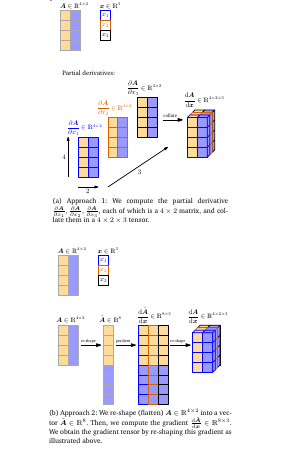

Fig.7 Visualization of gradient computation of a matrix with respect to a vector. We are interested in computing the gradient of A ∈ R4×2 with respect to a vector x ∈ R3 . We know that gradient dA dx ∈ R4×2×3 . We follow two equivalent approaches to arrive there: (a) collating partial derivatives into a Jacobian tensor; (b) flattening of the matrix into a vector, computing the Jacobian matrix, re-shaping into a Jacobian tensor.

## Approach 1: Collating Partial Derivatives into a Jacobian Tensor
We compute the partial derivatives:

$$
\frac{\partial A}{\partial x_1}, \quad \frac{\partial A}{\partial x_2}, \quad \frac{\partial A}{\partial x_3}
$$

Each of these is a $ 4 \times 2 $ matrix, and we collate them into a $ 4 \times 2 \times 3 $ tensor.

## Approach 2: Flattening and Computing the Jacobian Matrix
We reshape $ A \in \mathbb{R}^{4 \times 2} $ into a vector $ Ã \in \mathbb{R}^{8} $. Then, we compute the gradient:

$$
\frac{d Ã}{dx} \in \mathbb{R}^{8 \times 3}
$$

The gradient tensor is obtained by reshaping this gradient into the original dimensions.

## Gradients of Matrices
In many situations, we need to compute gradients of matrices with respect to vectors or other matrices, resulting in a multidimensional tensor. This tensor can be thought of as a multidimensional array.

# Gradient Computation of Matrices

## Collecting Partial Derivatives
For example, if we compute the gradient of an $ m \times n $ matrix $ A $ with respect to a $ p \times q $ matrix $ B $, the resulting Jacobian would be $ (m \times n) \times (p \times q) $, i.e., a four-dimensional tensor $ J $, whose entries are given as:

$$
J_{ijkl} = \frac{\partial A_{ij}}{\partial B_{kl}}
$$

Since matrices represent linear mappings, we can exploit the fact that there is a vector-space isomorphism (linear, invertible mapping) between the space $ \mathbb{R}^{m \times n} $ of $ m \times n $ matrices and the space $ \mathbb{R}^{mn} $ of $ mn $ vectors. Therefore, we can re-shape our matrices into vectors of lengths $ mn $ and $pq $, respectively.

The gradient using these $ mn $ vectors results in a Jacobian of size $ mn \times pq $.

Figure 5.7 visualizes both approaches.

## Practical Applications of Reshaping
In practical applications, it is often desirable to reshape the matrix into a vector and continue working with this Jacobian matrix. The chain rule boils down to simple matrix multiplication, whereas in the case of a Jacobian tensor, we will need to pay more attention to what dimensions we need to sum out.

## Example: Gradient of Vectors with Respect to Matrices

Let us consider the following example:

$$
f = A x, \quad f \in \mathbb{R}^{M}, \quad A \in \mathbb{R}^{M \times N}, \quad x \in \mathbb{R}^{N}
$$

where we seek the gradient $ \frac{df}{dA} $. 

### Determining the Dimension of the Gradient
By definition, the gradient is the collection of the partial derivatives:

$$
\frac{df}{dA} \in \mathbb{R}^{M \times (M \times N)}
$$

Written explicitly:

$$
\frac{df}{dA} =
\begin{bmatrix}
\frac{\partial f_1}{\partial A} \\
\vdots \\
\frac{\partial f_M}{\partial A}
\end{bmatrix}
\in \mathbb{R}^{1 \times (M \times N)}
$$

### Computing Partial Derivatives
To compute the partial derivatives, it will be helpful to explicitly write out the matrix-vector multiplication:

$$
f_i = \sum_{j=1}^{N} A_{ij} x_j, \quad i = 1, \dots, M
$$

The partial derivatives are then given as:

$$
\frac{\partial f_i}{\partial A_{iq}} = x_q
$$

This allows us to compute the partial derivatives of $ f_i $ with respect to a row of $ A $, which is given as:

$$
\frac{\partial f_i}{\partial A_{i,:}} = x^\top \in \mathbb{R}^{1 \times 1 \times N}
$$

# Useful Identities for Computing Gradients

We define the partial derivative tensor entries as follows:

$$
\partial_{pqij} =
\begin{cases}
R_{iq}, & \text{if } j = p, p \neq q \\
R_{ip}, & \text{if } j = q, p \neq q \\
2R_{iq}, & \text{if } j = p, p = q \\
0, & \text{otherwise}
\end{cases}
$$

From Equation (5.94), the desired gradient has the dimension \( (N \times N) \times (M \times N) \), and every single entry of this tensor is given by \( \partial_{pqij} \) above, where \( p, q, j = 1, \dots, N \) and \( i = 1, \dots, M \).

## Common Gradient Identities in Machine Learning

We list some useful gradients frequently required in a machine learning context (Petersen and Pedersen, 2012):

1. **Transpose of a Function's Gradient**:
   $$
   \frac{\partial}{\partial X} f(X)^\top = \left( \frac{\partial f(X)}{\partial X} \right)^\top
   $$

2. **Trace Gradient**:
   $$
   \frac{\partial}{\partial X} \text{tr}(f(X)) = \text{tr} \left( \frac{\partial f(X)}{\partial X} \right)
   $$

3. **Determinant Gradient**:
   $$
   \frac{\partial}{\partial X} \det(f(X)) = \det(f(X)) \text{tr} \left( f(X)^{-1} \frac{\partial f(X)}{\partial X} \right)
   $$

4. **Inverse Function Gradient**:
   $$
   \frac{\partial}{\partial X} f(X)^{-1} = -f(X)^{-1} \frac{\partial f(X)}{\partial X} f(X)^{-1}
   $$

5. **Gradient of Quadratic Forms**:
   $$
   \frac{\partial a^\top X^{-1} b}{\partial X} = -(X^{-1})^\top a b^\top (X^{-1})^\top
   $$

6. **Vector Gradients**:
   $$
   \frac{\partial x^\top a}{\partial x} = a^\top
   $$

   $$
   \frac{\partial a^\top x}{\partial x} = a^\top
   $$

7. **Matrix Gradients**:
   $$
   \frac{\partial a^\top Xb}{\partial X} = a b^\top
   $$

   $$
   \frac{\partial x^\top Bx}{\partial x} = x^\top (B + B^\top)
   $$

8. **Gradient of Quadratic Form with Weight Matrix**:
   $$
   \frac{\partial (x - As)^\top W (x - As)}{\partial s} = -2(x - As)^\top W A \quad \text{for symmetric } W
   $$

## Remark on Higher-Dimensional Tensors

While matrices allow us to compute traces and transposes, derivatives can extend to higher-dimensional tensors where traditional definitions do not apply. For example, the **trace** of a tensor of shape $ D \times D \times E \times F $ results in an $ E \times F $ matrix. This is a special case of a **tensor contraction**.


In [5]:
# Function to compute the gradient of matrix A w.r.t. matrix B
def compute_gradient(A, B):
    """ Computes the gradient ∂A / ∂B without using any libraries """
    m, n = len(A), len(A[0])   # A is m × n
    p, q = len(B), len(B[0])   # B is p × q

    # Initialize a 4D tensor for storing gradients
    J = [[[[0 for _ in range(q)] for _ in range(p)] for _ in range(n)] for _ in range(m)]

    for i in range(m):
        for j in range(n):
            for p_idx in range(p):
                for q_idx in range(q):
                    # Example derivative logic (user should replace with actual derivative formulas)
                    if j == p_idx and p_idx != q_idx:
                        J[i][j][p_idx][q_idx] = B[p_idx][q_idx]
                    elif j == q_idx and p_idx != q_idx:
                        J[i][j][p_idx][q_idx] = B[p_idx][j]
                    elif j == p_idx and p_idx == q_idx:
                        J[i][j][p_idx][q_idx] = 2 * B[p_idx][q_idx]
                    else:
                        J[i][j][p_idx][q_idx] = 0

    return J

# Example matrices A and B
A = [[1, 2], [3, 4], [5, 6], [7, 8]]  # A is 4 × 2
B = [[9, 10, 11], [12, 13, 14]]  # B is 2 × 3

# Compute gradient
gradient_tensor = compute_gradient(A, B)

# Display result
for i in range(len(gradient_tensor)):
    for j in range(len(gradient_tensor[0])):
        print(f"Gradient ∂A[{i},{j}]/∂B:")
        for row in gradient_tensor[i][j]:
            print(row)
        print()


Gradient ∂A[0,0]/∂B:
[18, 10, 11]
[12, 0, 0]

Gradient ∂A[0,1]/∂B:
[0, 10, 0]
[12, 26, 14]

Gradient ∂A[1,0]/∂B:
[18, 10, 11]
[12, 0, 0]

Gradient ∂A[1,1]/∂B:
[0, 10, 0]
[12, 26, 14]

Gradient ∂A[2,0]/∂B:
[18, 10, 11]
[12, 0, 0]

Gradient ∂A[2,1]/∂B:
[0, 10, 0]
[12, 26, 14]

Gradient ∂A[3,0]/∂B:
[18, 10, 11]
[12, 0, 0]

Gradient ∂A[3,1]/∂B:
[0, 10, 0]
[12, 26, 14]



## Transposing a Tensor

In tensor computations, the term **"transpose"** refers to swapping the **first two dimensions** of a multi-dimensional array. Specifically, in equations (5.99) through (5.102), we require tensor-related operations when working with multivariate functions $ f(\cdot) $ and computing derivatives with respect to matrices, particularly when avoiding vectorization (as discussed in Section 5.4).

---

## Backpropagation and Automatic Differentiation

In many machine learning applications, we determine optimal **model parameters** by performing **gradient descent** (see Section 7.1). This process relies on computing the **gradient** of the learning objective with respect to the parameters of the model.

For a given **objective function**, we obtain the gradient using **calculus** and the **chain rule** (Section 5.2.2). We've already seen an example in Section 5.3 when analyzing the gradient of a squared loss function in **linear regression**.

---

## Example Function for Gradient Calculation

Consider the function:

$$
f(x) = x^2 + \exp(x^2) + \cos(x^2) + \exp(x^2)
$$

Using **the chain rule**, and noting that differentiation is linear, we compute:

$$
\frac{df}{dx} = 2x + 2x \exp(x^2) - \sin(x^2) + \exp(x^2) + 2x + 2x \exp(x^2)
$$

Rearranging:

$$
\frac{df}{dx} = 2x \left( 1 - \sin(x^2) + \exp(x^2) \right) \left( 1 + \exp(x^2) \right)
$$

In practice, computing such a gradient explicitly can be **impractical**, as it often results in **lengthy expressions**. If not optimized properly, the gradient calculation can become **more computationally expensive** than evaluating the original function, leading to unnecessary overhead.

---

## Backpropagation Algorithm

For deep neural networks, the **backpropagation algorithm** (Kelley, 1960; Bryson, 1961; Dreyfus, 1962; Rumelhart et al., 1986) provides an efficient way to compute the **gradient of an error function** with respect to model parameters.

## Gradients in Deep Networks

One area where the **chain rule** is extensively used is **deep learning**, where a function $ y $ is computed using multiple function compositions:

$$
y = (f_K \circ f_{K-1} \circ \cdots \circ f_1)(x) = f_K(f_{K-1}(\cdots(f_1(x))\cdots))
$$

Here:
- $ x $ represents **input data** (e.g., images).
- $ y $ represents **output observations** (e.g., class labels).
- Each function $ f_i $ has its own **parameters**.

Backpropagation efficiently computes **gradients** layer-by-layer using the **chain rule**, allowing neural networks to learn effectively.

# Forward Pass in a Multi-Layer Neural Network

In neural networks with multiple layers, we define the layer function as:

$$
f_i(x_{i-1}) = \sigma(A_{i-1} x_{i-1} + b_{i-1})
$$

where:
- $ x_{i-1} $ is the output from layer $ i-1 $,
- $ \sigma $ is an activation function (e.g., **logistic sigmoid**, **tanh**, or **ReLU**).

To train these models, we require the gradient of a loss function $ L $ with respect to the model parameters $ A_j, b_j $, for $ j = 1, \dots, K $. We also compute the gradient of $ L $ with respect to the inputs of each layer.

## Network Structure

Given inputs $ x $ and observations $ y $, the network structure is defined as:

$$
f^0 := x
$$

$$
f^i := \sigma_i(A_{i-1} f^{i-1} + b_{i-1}), \quad i = 1, \dots, K
$$

We aim to optimize the parameters $ A_j, b_j $ such that the squared loss function is minimized:

$$
L(\theta) = \| y - f^K(\theta, x) \|^2
$$

where:

$$
\theta = \{ A_0, b_0, \dots, A_{K-1}, b_{K-1} \}
$$

---
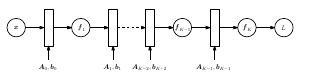

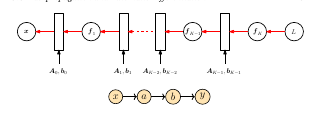

## Computing Gradients Using the Chain Rule

The chain rule allows us to compute the partial derivatives of $ L $ with respect to the parameters $ \theta_j = \{A_j, b_j\} $:

$$
\frac{\partial L}{\partial \theta_{K-1}} = \frac{\partial L}{\partial f^K} \frac{\partial f^K}{\partial \theta_{K-1}}
$$

$$
\frac{\partial L}{\partial \theta_{K-2}} = \frac{\partial L}{\partial f^K} \frac{\partial f^K}{\partial f^{K-1}} \frac{\partial f^{K-1}}{\partial \theta_{K-2}}
$$

$$
\frac{\partial L}{\partial \theta_{K-3}} = \frac{\partial L}{\partial f^K} \frac{\partial f^K}{\partial f^{K-1}} \frac{\partial f^{K-1}}{\partial f^{K-2}} \frac{\partial f^{K-2}}{\partial \theta_{K-3}}
$$

More generally:

$$
\frac{\partial L}{\partial \theta_i} = \frac{\partial L}{\partial f^K} \frac{\partial f^K}{\partial f^{K-1}} \cdots \frac{\partial f^{i+1}}{\partial \theta_i}
$$

### Understanding the Terms:
- **Orange terms**: Partial derivatives of a layer output with respect to its inputs.
- **Blue terms**: Partial derivatives of a layer output with respect to its parameters.

If $ \frac{\partial L}{\partial \theta_{i+1}} $ has already been computed, we can **reuse most computations** to efficiently obtain $ \frac{\partial L}{\partial \theta_i} $, reducing unnecessary overhead.

---

## Additional Resources

For a more **in-depth discussion** on neural network gradients and backpropagation, refer to:




In [6]:
import math

# Define activation functions and their derivatives
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the Sigmoid function"""
    return x * (1 - x)

# Define a simple Neural Network class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize network weights and biases manually"""
        # Weights between input and hidden layer
        self.W1 = [[0.5, 0.2], [0.3, 0.7]]  # Example values (2x2 matrix)
        self.b1 = [0.1, 0.2]

        # Weights between hidden and output layer
        self.W2 = [[0.6, 0.9]]  # Example values (1x2 matrix)
        self.b2 = [0.3]

    def forward(self, x):
        """Forward pass computation"""
        # Input to hidden layer
        self.z1 = [sum(x[i] * self.W1[i][j] for i in range(len(x))) + self.b1[j] for j in range(len(self.b1))]
        self.a1 = [sigmoid(v) for v in self.z1]  # Apply activation function
        
        # Hidden to output layer
        self.z2 = [sum(self.a1[i] * self.W2[0][i] for i in range(len(self.a1))) + self.b2[0]]
        self.a2 = [sigmoid(v) for v in self.z2]  # Output activation
        
        return self.a2

    def backward(self, x, y, learning_rate=0.1):
        """Backward pass using manual backpropagation"""
        # Compute loss gradient at output layer
        error_output = [(self.a2[i] - y[i]) for i in range(len(y))]
        d_output = [error_output[i] * sigmoid_derivative(self.a2[i]) for i in range(len(y))]

        # Compute loss gradient at hidden layer
        error_hidden = [sum(d_output[i] * self.W2[i][j] for i in range(len(d_output))) for j in range(len(self.a1))]
        d_hidden = [error_hidden[j] * sigmoid_derivative(self.a1[j]) for j in range(len(self.a1))]

        # Update weights and biases (Gradient Descent)
        for i in range(len(self.W2[0])):
            self.W2[0][i] -= learning_rate * d_output[0] * self.a1[i]
        self.b2[0] -= learning_rate * d_output[0]

        for i in range(len(self.W1)):
            for j in range(len(self.W1[i])):
                self.W1[i][j] -= learning_rate * d_hidden[j] * x[i]
            self.b1[i] -= learning_rate * d_hidden[i]

# Example usage:
nn = SimpleNN(input_size=2, hidden_size=2, output_size=1)

# Sample input and expected output
x = [0.5, 0.8]
y = [1]

# Forward pass
output = nn.forward(x)
print("Output before training:", output)

# Training loop
for epoch in range(1000):
    nn.backward(x, y, learning_rate=0.05)

# Forward pass after training
output = nn.forward(x)
print("Output after training:", output)


Output before training: [0.7889176625306139]
Output after training: [0.995164913282539]


# Automatic Differentiation in Machine Learning

## Introduction

Automatic Differentiation (AD) is a technique used in numerical analysis to compute **exact gradients** of functions using intermediate variables and the **chain rule**. Unlike symbolic differentiation, which explicitly derives equations, AD **evaluates gradients numerically**, allowing efficient computations up to machine precision.

AD can be classified into:
- **Forward Mode AD**: Computes derivatives as data flows **from inputs to outputs**.
- **Reverse Mode AD**: Computes derivatives **backward** (propagating gradients **from outputs to inputs**). This is the foundation of **backpropagation** in neural networks.

---

## Computing Gradients Using AD

### Example Function:

$$
f(x) = x^2 + \exp(x^2) + \cos(x^2) + \exp(x^2)
$$

Using intermediate variables:

$$
a = x^2
$$

$$
b = \exp(a)
$$

$$
c = a + b
$$

$$
d = \sqrt{c}
$$

$$
e = \cos(c)
$$

$$
f = d + e
$$

This structured computation minimizes redundant calculations and mirrors **computation graphs** used in deep learning frameworks.

---

## Derivatives Using Chain Rule

Applying the **chain rule**, we compute:

$$
\frac{\partial a}{\partial x} = 2x
$$

$$
\frac{\partial b}{\partial a} = \exp(a)
$$

$$
\frac{\partial c}{\partial a} = 1, \quad \frac{\partial c}{\partial b} = 1
$$

$$
\frac{\partial d}{\partial c} = \frac{1}{2\sqrt{c}}
$$

$$
\frac{\partial e}{\partial c} = -\sin(c)
$$

$$
\frac{\partial f}{\partial d} = 1, \quad \frac{\partial f}{\partial e} = 1
$$

Using **reverse mode AD**, we compute:

$$
\frac{\partial f}{\partial x} =
\frac{\partial f}{\partial d} \frac{\partial d}{\partial c} \frac{\partial c}{\partial a} \frac{\partial a}{\partial x} +
\frac{\partial f}{\partial e} \frac{\partial e}{\partial c} \frac{\partial c}{\partial a} \frac{\partial a}{\partial x}
$$

---

## Why Reverse Mode AD in Deep Learning?

In **neural networks**, the input dimensionality is typically much higher than the output dimensionality. Reverse mode AD efficiently computes **gradients layer by layer**, reducing computational cost compared to forward mode AD.

---
# Automatic Differentiation in Machine Learning

## Introduction

Automatic Differentiation (AD) is a technique used in numerical analysis to compute **exact gradients** of functions using intermediate variables and the **chain rule**. Unlike symbolic differentiation, which explicitly derives equations, AD **evaluates gradients numerically**, allowing efficient computations up to machine precision.

AD can be classified into:
- **Forward Mode AD**: Computes derivatives as data flows **from inputs to outputs**.
- **Reverse Mode AD**: Computes derivatives **backward** (propagating gradients **from outputs to inputs**). This is the foundation of **backpropagation** in neural networks.

---

## Computing Gradients Using AD

### Example Function:

$$
f(x) = x^2 + \exp(x^2) + \cos(x^2) + \exp(x^2)
$$

Using intermediate variables:

$$
a = x^2
$$

$$
b = \exp(a)
$$

$$
c = a + b
$$

$$
d = \sqrt{c}
$$

$$
e = \cos(c)
$$

$$
f = d + e
$$

This structured computation minimizes redundant calculations and mirrors **computation graphs** used in deep learning frameworks.

---

## Derivatives Using Chain Rule

Applying the **chain rule**, we compute:

$$
\frac{\partial a}{\partial x} = 2x
$$

$$
\frac{\partial b}{\partial a} = \exp(a)
$$

$$
\frac{\partial c}{\partial a} = 1, \quad \frac{\partial c}{\partial b} = 1
$$

$$
\frac{\partial d}{\partial c} = \frac{1}{2\sqrt{c}}
$$

$$
\frac{\partial e}{\partial c} = -\sin(c)
$$

$$
\frac{\partial f}{\partial d} = 1, \quad \frac{\partial f}{\partial e} = 1
$$

Using **reverse mode AD**, we compute:

$$
\frac{\partial f}{\partial x} =
\frac{\partial f}{\partial d} \frac{\partial d}{\partial c} \frac{\partial c}{\partial a} \frac{\partial a}{\partial x} +
\frac{\partial f}{\partial e} \frac{\partial e}{\partial c} \frac{\partial c}{\partial a} \frac{\partial a}{\partial x}
$$

---

## Why Reverse Mode AD in Deep Learning?

In **neural networks**, the input dimensionality is typically much higher than the output dimensionality. Reverse mode AD efficiently computes **gradients layer by layer**, reducing computational cost compared to forward mode AD.

---



## Automatic Differentiation and Higher-Order Derivatives

### Computation Graphs and Chain Rule

Given a function expressed as a **computation graph**, we define:

- $ g_i(\cdot) $ as elementary functions.
- $ x_{\text{Pa}(x_i)} $ as the parent nodes of the variable $ x_i $ in the graph.

Using the **chain rule**, we compute derivatives **step-by-step**.

### Forward Propagation:

$$
x_i = g_i(x_{\text{Pa}(x_i)}), \quad i = d+1, \dots, D
$$

### Backpropagation (Gradient Computation):

By definition:

$$
f = x_D \quad \Rightarrow \quad \frac{\partial f}{\partial x_D} = 1
$$

For other variables $ x_i $, we apply the **chain rule**:

$$
\frac{\partial f}{\partial x_i} = \sum_{j: x_i \in \text{Pa}(x_j)} \frac{\partial f}{\partial x_j} \frac{\partial x_j}{\partial x_i}
$$

where $ \text{Pa}(x_j) $ represents the **parent nodes** of $ x_j $ in the computation graph.

Automatic differentiation efficiently computes gradients when functions are expressed as computation graphs with **differentiable elementary functions**.

---

# Higher-Order Derivatives

### **Notation for Higher-Order Partial Derivatives**
Consider a function $ f: \mathbb{R}^2 \to \mathbb{R} $ with variables $ x $ and $ y $:

- $ \frac{\partial^2 f}{\partial x^2} $: Second-order derivative of $ f $ with respect to $ x $.
- $ \frac{\partial^n f}{\partial x^n} $: $ n $-th order derivative of $ f $ with respect to $ x $.
- $ \frac{\partial^2 f}{\partial y \partial x} $: First differentiating by $ x $, then by $ y $.
- $ \frac{\partial^2 f}{\partial x \partial y} $: First differentiating by $ y $, then by $ x $.

### **The Hessian Matrix**
The Hessian is the matrix containing **all second-order partial derivatives**, defined as:

$$
H(f) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
$$

The Hessian plays a critical role in **optimization algorithms**, such as **Newton's Method**, which requires second-order derivatives for curvature analysis.

---

### **Why Automatic Differentiation Matters?**
Automatic differentiation enables efficient computation of **both first-order gradients and second-order Hessians**, allowing rapid optimization in machine learning applications.




In [7]:
# Function to compute the derivative of f(x, y) using finite differences
def derivative(f, x, y, var='x', h=1e-5):
    """ Compute first derivative using central finite difference method """
    if var == 'x':
        return (f(x + h, y) - f(x - h, y)) / (2 * h)
    elif var == 'y':
        return (f(x, y + h) - f(x, y - h)) / (2 * h)

# Function to compute the Hessian matrix
def hessian(f, x, y, h=1e-5):
    """ Compute Hessian matrix using finite differences """
    dxx = (f(x + h, y) - 2 * f(x, y) + f(x - h, y)) / (h ** 2)
    dyy = (f(x, y + h) - 2 * f(x, y) + f(x, y - h)) / (h ** 2)
    dxy = (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h ** 2)

    return [[dxx, dxy], [dxy, dyy]]

# Example function: f(x, y) = x**2 + y**2 + xy
def example_function(x, y):
    return x**2 + y**2 + x*y

# Compute Hessian at (1, 2)
hessian_matrix = hessian(example_function, 1, 2)

# Display result
print("Hessian Matrix:")
for row in hessian_matrix:
    print(row)


Hessian Matrix:
[2.0000001654807416, 0.9999978622943216]
[0.9999978622943216, 2.0000001654807416]
